In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from PIL.ExifTags import TAGS
from statsmodels.distributions.empirical_distribution import ECDF


In [2]:
img = cv2.imread("WIN_20240112_18_10_15_Pro.jpg", 0)

<Axes: >

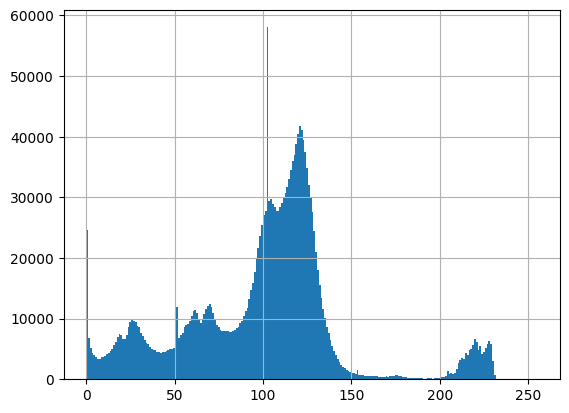

In [3]:
pd.Series(img.flatten()).hist(bins=250)

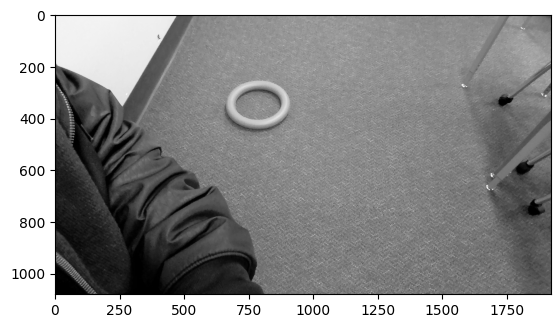

In [4]:
plt.imshow(img, cmap="Greys_r")
plt.show()

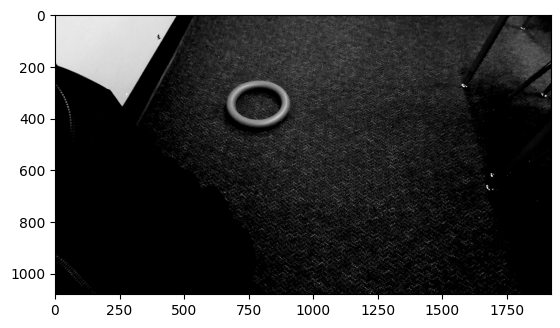

In [7]:
sat_img = img.copy()
cv2.add(img, -100, sat_img)
plt.imshow(sat_img, cmap="Greys_r")
plt.show()

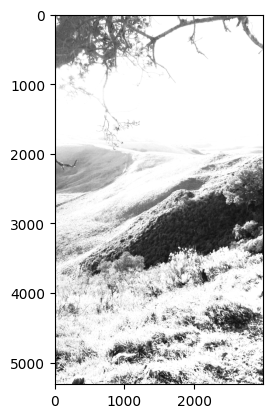

In [63]:
sat_img = (img.astype("float") / 255).copy()
np.clip(sat_img + (200/255), 0, 1, sat_img)
plt.imshow(sat_img, cmap="Greys_r")
plt.show()

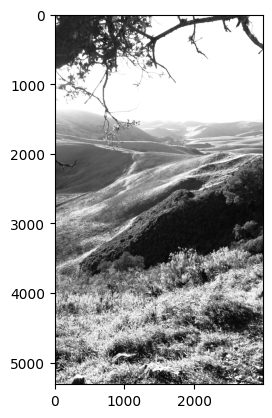

In [66]:
contr_img = cv2.multiply(img, 2)
plt.imshow(contr_img, cmap="Greys_r")
plt.show()

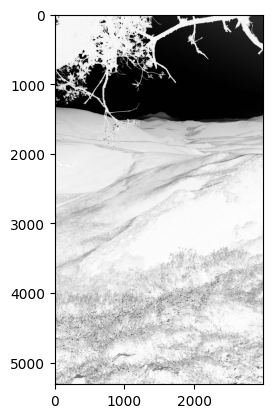

In [71]:
plt.imshow(255 - img, cmap="Greys_r")
plt.show()

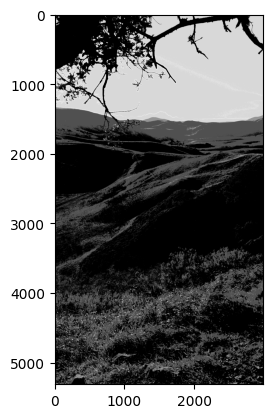

In [86]:
poster_bins = 4
poster_adj = 255 / poster_bins
posterized_img = poster_adj * np.floor(img / poster_adj)
posterized_img = np.clip(posterized_img, 0, 255)
posterized_img = posterized_img.astype("uint8")

plt.imshow(posterized_img, cmap="Greys_r")
plt.show()

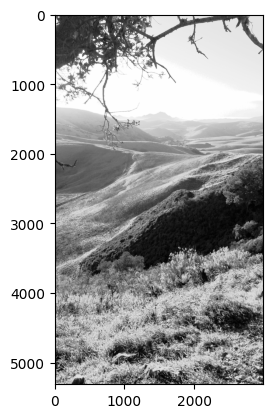

In [10]:
hist_norm_img = img.flatten()
hist_ecdf = ECDF(hist_norm_img)
hist_norm_img = hist_ecdf(hist_norm_img).reshape(img.shape)

plt.imshow(hist_norm_img, cmap="Greys_r")
plt.show()

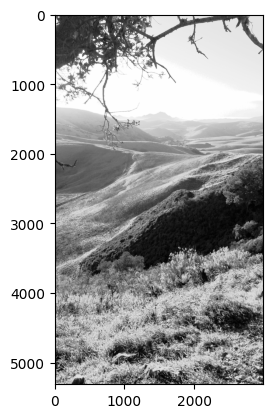

In [22]:
hist_norm_img = img.flatten()
hist_ecdf_key = np.sort(hist_norm_img)
hist_ecdf_value = np.arange(1, len(hist_ecdf_key) + 1) / float(len(hist_ecdf_key))
hist_ecdf = pd.DataFrame({"key": hist_ecdf_key, "value": hist_ecdf_value}).groupby("key")["value"].max().to_dict()

hist_norm_img = np.vectorize(hist_ecdf.get)(hist_norm_img).reshape(img.shape)
plt.imshow(hist_norm_img, cmap="Greys_r")
plt.show()

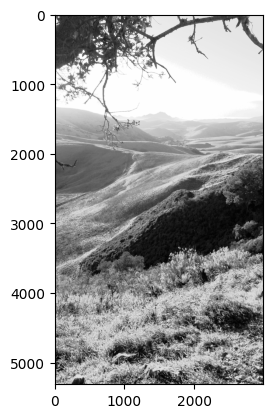

In [23]:
hist_norm_img = cv2.equalizeHist(img)
plt.imshow(hist_norm_img, cmap="Greys_r")
plt.show()

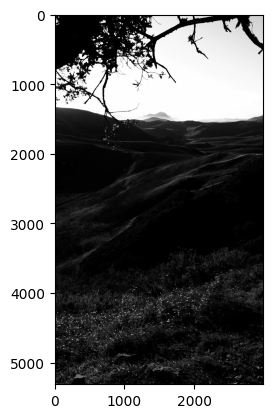

In [24]:
gamma_corr_img = img**2.2
plt.imshow(gamma_corr_img, cmap="Greys_r")
plt.show()

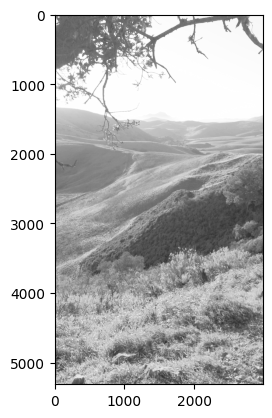

In [27]:
gamma = 0.4
gamma_corr_img = (((img / 255.0)**gamma) * 255).astype("uint8")
plt.imshow(gamma_corr_img, cmap="Greys_r")
plt.show()

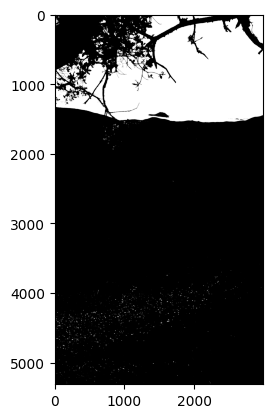

In [42]:
thresh_img = img >= 210
plt.imshow(thresh_img, cmap="Greys_r")
plt.show()

In [38]:
camera = cv2.VideoCapture("test_video.mp4", 0)
camera.set(1, 1)
ret, pixels_start = camera.read()
pixels_start = cv2.cvtColor(pixels_start, cv2.COLOR_BGR2GRAY)
camera.set(1, 2)
ret, pixels_end = camera.read()
pixels_end = cv2.cvtColor(pixels_end, cv2.COLOR_BGR2GRAY)

camera.release()
cv2.destroyAllWindows()

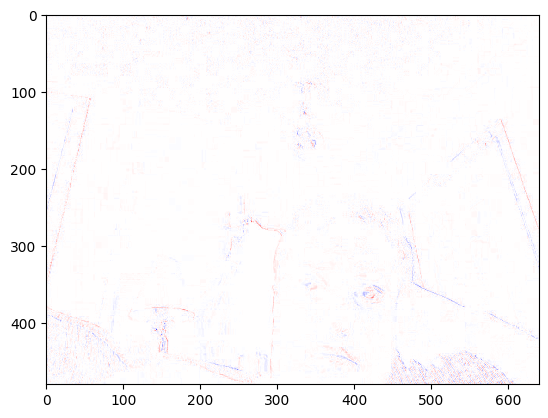

In [39]:
diffed_img = (pixels_end / 255.0) - (pixels_start / 255.0)
plt.imshow(diffed_img, cmap="bwr")
plt.show()

In [98]:
img_back = cv2.imread("20170311_172915.jpg")
#img_back = cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB)
img_fore = cv2.imread("frc_game_cube.jpeg")
#img_fore = cv2.cvtColor(img_fore, cv2.COLOR_BGR2RGB)

is_green_mask = img_fore[:, :, 1] == 177
not_green_mask = ~is_green_mask
is_green_mask = np.repeat(is_green_mask[:, :, np.newaxis], 3, 2).astype("uint8")
not_green_mask = np.repeat(not_green_mask[:, :, np.newaxis], 3, 2).astype("uint8")

fore_overlay = not_green_mask * img_fore
back_overlay = is_green_mask * img_back

full_overlay = fore_overlay + back_overlay

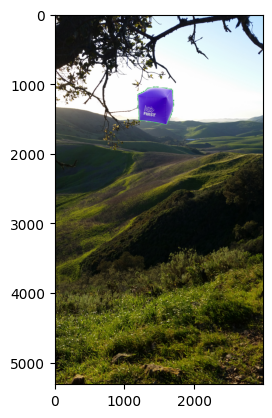

In [102]:
plt.imshow(cv2.cvtColor(full_overlay, cv2.COLOR_BGR2RGB))
plt.show()